/Users/katemiller/Desktop/early-warning-signal-DLM-master/dlm_functions.py:174: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(xtick,('00','02','04','06','08','10','12','14','16'))


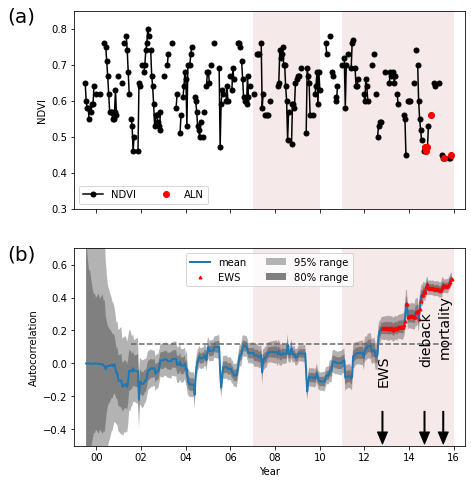

In [1]:
import numpy as np
from numpy import matlib as mb
from datetime import datetime
from dlm_functions import computeAnormaly,forwardFilteringM, Model,PlotEWS

#%%
        
# NDVI time seires
N = np.loadtxt('Inputs/NDVI.txt')
fill_value = -999

# climate conditions in order: 
# precipitation plus snowmelt (mm/day)  
# air temperature (degree C)
# vapor pressure deficit (kPa)
# net shortwave radiation (W/m2)
CLM = np.loadtxt('Inputs/CLM.txt') 

# daily averages of climate conditions in the same order
AvgCLM = np.loadtxt('Inputs/AvgCLM.txt') 

# compute climate anomaly within each interval of two NDVI observations
date0 = datetime(1999,6,30) # the data of first NDVI obervation
anCLM = computeAnormaly(CLM,AvgCLM,date0)

# center NDVI time series
N[N==fill_value] = np.nan
Y = N[1:]-np.nanmean(N) 

# use two seasonal harmonic components
rseas = [1,2] 

# include lag-1 centerred NDVI and precipitation in the regression module 
X = np.column_stack((N[:-1]-np.nanmean(N),anCLM[:-1,0])) 

# set up model and run forward filtering
delta = 0.98
M = Model(Y,X,rseas,delta)
FF = forwardFilteringM(M)

# model likelihood
slik = FF.get('slik')

# extract estimates on the coefficient corresponding to lag-1 NDVI
vid = 2 # index of autocorrelation
sm = FF.get('sm')[vid,:] # mean of autocorrelation
sC = FF.get('sC')[vid,vid,:] # variance of autocorrelation
snu = FF.get('snu') # degree of freedom

# plot Fig. 1 in the manuscript
PlotEWS(N,date0,sm,sC,snu)
